# **New York City Yellow Taxi Data**

### Name: Shubham Modi

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings


In [16]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [28]:
# Try loading one file

df = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [19]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')
import os
print("Current Directory:", os.getcwd())
print("Files:", os.listdir())

Current Directory: /Users/shubhammodi/Downloads/Starter Notebook - EDA NYC Taxi
Files: ['EDA_Assg_NYC_Taxi_Starter.ipynb', 'sampled_nyc_taxi.csv', '.ipynb_checkpoints', 'Report_NYC_Taxi_Operations_Starter.docx']


In [30]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        cf = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        cf['tpep_pickup_datetime'] = pd.to_datetime(cf['tpep_pickup_datetime'])
        cf['date'] = cf['tpep_pickup_datetime'].dt.date
        cf['hour'] = cf['tpep_pickup_datetime'].dt.hour
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe
        for date in cf['date'].unique():
            df_date = cf[cf['date'] == date]
            for hour in range(24):
                hour_data = df_date[df_date['hour'] == hour]
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.01, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Completed sampling for: {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Completed sampling for: 2023-12.parquet
Completed sampling for: 2023-6.parquet
Completed sampling for: 2023-7.parquet
Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Completed sampling for: 2023-5.parquet
Completed sampling for: 2023-11.parquet
Error reading file sampled_nyc_taxi.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Completed sampling for: 2023-10.parquet
Completed sampling for: 2023-4.parquet
Completed sampling for: 2023-1.parquet
Completed sampling for: 2023-8.parquet
Completed sampling for: 2023-9.parquet
Completed sampling for: 2023-2.parquet
Completed sampling for: 2023-3.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [31]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('sampled_nyc_taxi.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [32]:
# Load the new data file
df = pd.read_csv('sampled_nyc_taxi.csv')


In [33]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,NaN,231,61,0,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,NaN,137,144,0,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [34]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               379268 non-null  int64  
 1   tpep_pickup_datetime   379268 non-null  object 
 2   tpep_dropoff_datetime  379268 non-null  object 
 3   passenger_count        366326 non-null  float64
 4   trip_distance          379268 non-null  float64
 5   RatecodeID             366326 non-null  float64
 6   store_and_fwd_flag     366326 non-null  object 
 7   PULocationID           379268 non-null  int64  
 8   DOLocationID           379268 non-null  int64  
 9   payment_type           379268 non-null  int64  
 10  fare_amount            379268 non-null  float64
 11  extra                  379268 non-null  float64
 12  mta_tax                379268 non-null  float64
 13  tip_amount             379268 non-null  float64
 14  tolls_amount           379268 non-nu

(379268, 22)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [35]:
# Fix the index and drop any columns that are not needed
df.head()
df.drop(columns=['store_and_fwd_flag'], inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [36]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
df.drop(columns=['airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [37]:
# check where values of fare amount are negative
df[df['fare_amount']<0]
# No negative fare amount in the sampled data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
# No negative fare amount in the sampled data

In [40]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include='number')
negative_mask = (numeric_df < 0).any()
negative_mask

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
Airport_fee              False
hour                     False
dtype: bool

In [39]:
# fix these negative values

(df['total_amount'] < 0).sum()
df = df[df['total_amount'] >= 0]
df = df[df['extra']>=0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [41]:
# Find the proportion of missing values in each column
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12942
trip_distance                0
RatecodeID               12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     12942
Airport_fee              12942
date                         0
hour                         0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [42]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.isnull().any(axis=1)]
# df[df['passenger_count']==0]
zero_passengers = df[df['passenger_count'] == 0]
# print(zero_passengers[['fare_amount', 'total_amount', 'trip_distance']].describe())
mode_passenger = df['passenger_count'].mode()[0]
df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode_passenger
df[df['passenger_count'] == 0]
null_passengers = df[df['passenger_count'].isnull()]
# print(null_passengers[['fare_amount', 'total_amount', 'trip_distance']].describe())
df.loc[df['passenger_count'].isnull(), 'passenger_count'] = mode_passenger
null_passengers = df[df['passenger_count'].isnull()]

# Imputed mode (most occuring passenger count) to rows where passenger count is 0 or null, as they are genuine taxi rides
# according to fare amount and ride distance.

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [43]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()
invalid_ratecode_rows = df[df['RatecodeID'] == 99.0]
print(invalid_ratecode_rows[['fare_amount', 'trip_distance', 'payment_type']].describe())
df.loc[df['RatecodeID'] == 99.0, 'RatecodeID'] = 1.0

       fare_amount  trip_distance  payment_type
count  2133.000000    2133.000000   2133.000000
mean     33.191350       6.656353      1.000938
std      14.957975       5.821270      0.030614
min       0.000000       0.000000      1.000000
25%      20.500000       1.900000      1.000000
50%      30.500000       5.200000      1.000000
75%      42.500000      10.700000      1.000000
max     200.000000      35.400000      2.000000


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [44]:
# handle null values in congestion_surcharge
# df[df['congestion_surcharge'].isnull()]
df['congestion_surcharge'].value_counts()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0.0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [45]:
# Handle any remaining missing values

df.isnull().sum()
df['RatecodeID'].value_counts(normalize=True)
missing_ratecode_rows = df[df['RatecodeID'].isnull()]
# print(missing_ratecode_rows[['fare_amount', 'trip_distance', 'payment_type']].describe())

standard_rate_rows = df[df['RatecodeID'] == 1.0]
# print(standard_rate_rows[['fare_amount', 'trip_distance', 'payment_type']].describe())
df['RatecodeID'] = df['RatecodeID'].fillna(1.0)
df['Airport_fee'] = df['Airport_fee'].fillna(0.0)
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
date                     0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

count    379232.000000
mean          1.369940
std           0.862516
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64


count    379232.000000
mean          3.433874
std           4.522290
min           0.000000
25%           1.050000
50%           1.790000
75%           3.400000
max         187.350000
Name: trip_distance, dtype: float64

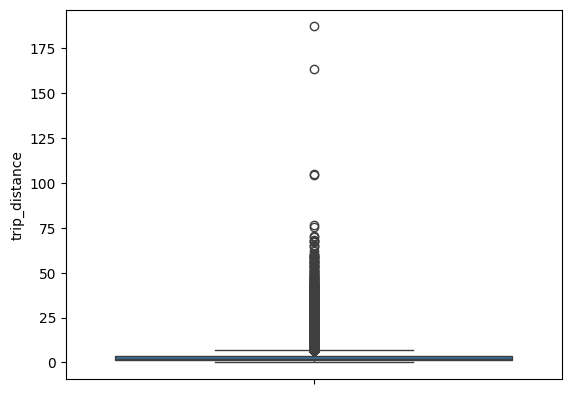

In [276]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import matplotlib.pyplot as plt
import seaborn as sns
# df.describe()
# sns.boxplot(df['passenger_count'])
print(df['passenger_count'].describe())
sns.boxplot(df['trip_distance'])

df['trip_distance'].describe()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [49]:
# remove passenger_count > 6
df = df[df['passenger_count']<=6]
condition1 = (df['trip_distance'] < 0.01) & (df['fare_amount'] > 300)
condition1.sum()
df = df[~((df['trip_distance'] < 0.01) & (df['fare_amount'] > 300))]
condition2 = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])
condition2.sum()
condition4 = df['payment_type'] == 0
condition4.sum()
df[df['payment_type']==0].describe()
# df[df['payment_type'] == 0][['fare_amount', 'trip_distance', 'total_amount']].describe()
df.loc[(df['payment_type']== 0),'payment_type'] = 1

In [50]:
# Continue with outlier handling
df = df[df['trip_distance'] <= 250]


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [51]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`
* `tpep_pickup_datetime`
* `tpep_dropoff_datetime`
* `passenger_count`
* `trip_distance`
* `RatecodeID`
* `PULocationID`
* `DOLocationID`
* `payment_type`
* `pickup_hour`
* `trip_duration`


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`


**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical, Represents a vendor, not quantities.
* `tpep_pickup_datetime`: Categorical, Timestamp
* `tpep_dropoff_datetime`: Categorical, Timestamp
* `passenger_count`: Numerical, integer number of passengers
* `trip_distance`: Numerical, distance in miles
* `RatecodeID`: Categorical, Codes for types of fare rates
* `PULocationID`: Categorical, Zone ID represents categories not values
* `DOLocationID`: Categorical, Zone ID represents categories not values
* `payment_type`: Categorical, Encoded payment methods
* `pickup_hour`: Categorical (Ordinal), Hour of day
* `trip_duration`: Numerical, Duration in mins or secs.


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Numerical - These are continuous monetary values — used for analysis, aggregation (sum, mean, etc.).

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

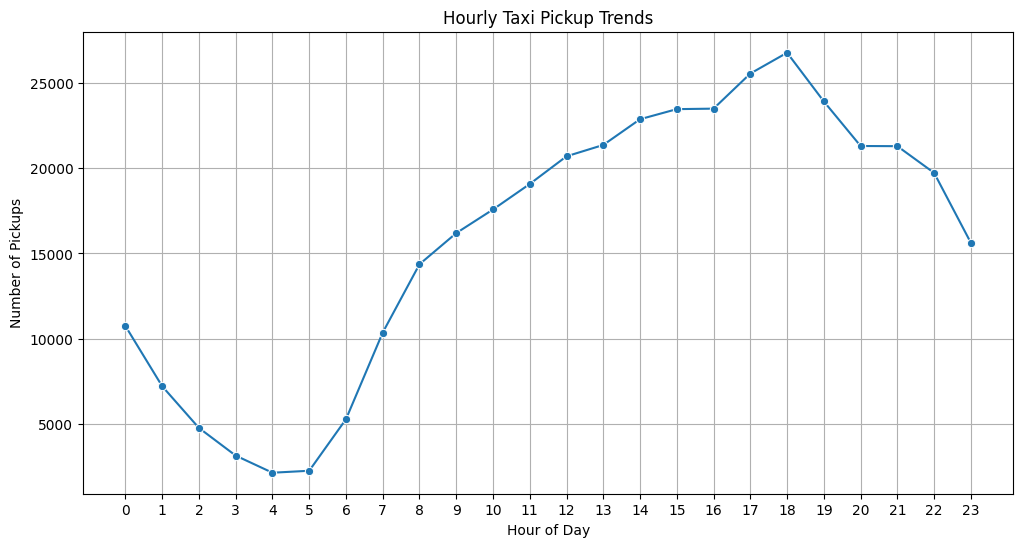

In [271]:
# Find and show the hourly trends in taxi pickups

# df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
# df.drop(columns=['hour'], inplace=True)
hourly_counts = df['pickup_hour'].value_counts().sort_index()
hourly_counts
plt.figure(figsize=(12,6))
sns.lineplot(x = hourly_counts.index, y = hourly_counts.values, marker='o')
plt.title("Hourly Taxi Pickup Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Conclusions:
# ⏰ Late Night (12 AM – 5 AM)
# 	•	Sharp drop after midnight
# 	•	Lowest activity around 4–5 AM
# 	•	✅ Insight: Low demand — fewer taxis needed; could reduce active fleet to save fuel/effort

# ☀️ Morning Ramp-Up (6 AM – 9 AM)
# 	•	Significant rise starting around 6 AM
# 	•	Commuter flow starts peaking
# 	•	✅ Insight: Position taxis in residential zones to meet early demand

# 🌆 Midday to Evening Peak (10 AM – 6 PM)
# 	•	Steady growth and sustained high demand from 10 AM to 6 PM
# 	•	Highest point at 6 PM (18:00 hrs)
# 	•	✅ Insight: This is the sweet spot — highest earning potential. Ensure max fleet availability, possibly offer incentives to drivers.

# 🌙 Evening Wind-Down (7 PM – 11 PM)
# 	•	Gradual decline but still strong numbers
# 	•	✅ Insight: Some nightlife pickups; keep moderate fleet in entertainment zones

/var/folders/xs/b8h7_q4j3_v7rd1q9vdr6wz40000gn/T/ipykernel_37210/4016834017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette="crest")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


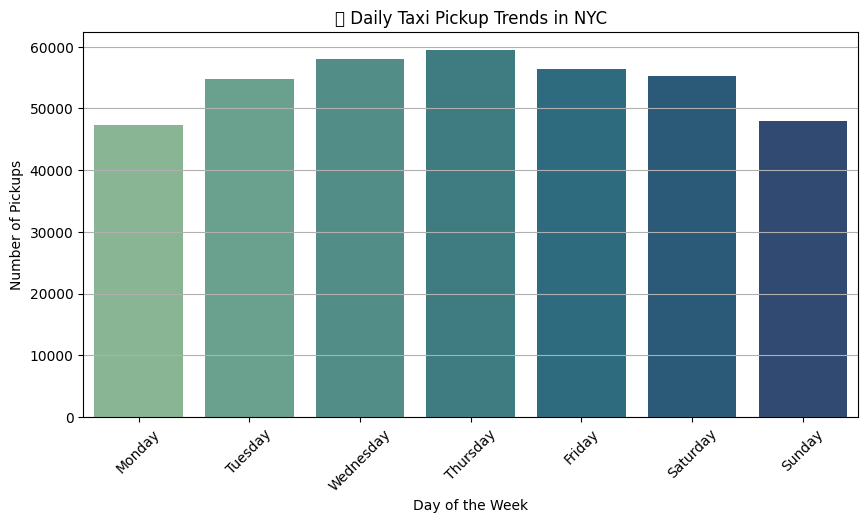

In [272]:
# Find and show the daily trends in taxi pickups (days of the week)
# df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
# df['pickup_day'].value_counts()
daily_counts = df['pickup_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette="crest")
plt.title("📅 Daily Taxi Pickup Trends in NYC")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Conclusions:
# Monday: Lowest demand - post-weekend (typical)
# Tuesday -> Thursday: Steady rise - regular workweek
# Thursday: Peak pickups - possibly after-work events
# Friday -> Saturday: Slight dip after Thursday, but still high - weekend starts, nightlife
# Sunday: Drops again - slow recovery day

# 	•	Thursday = High Demand → Consider surge pricing or larger fleet allocation
# 	•	Low on Mondays → Reduce active fleet, offer driver breaks or maintenance slots
# 	•	Weekend Late Nights → Consider scheduling more pickups for bar/club districts

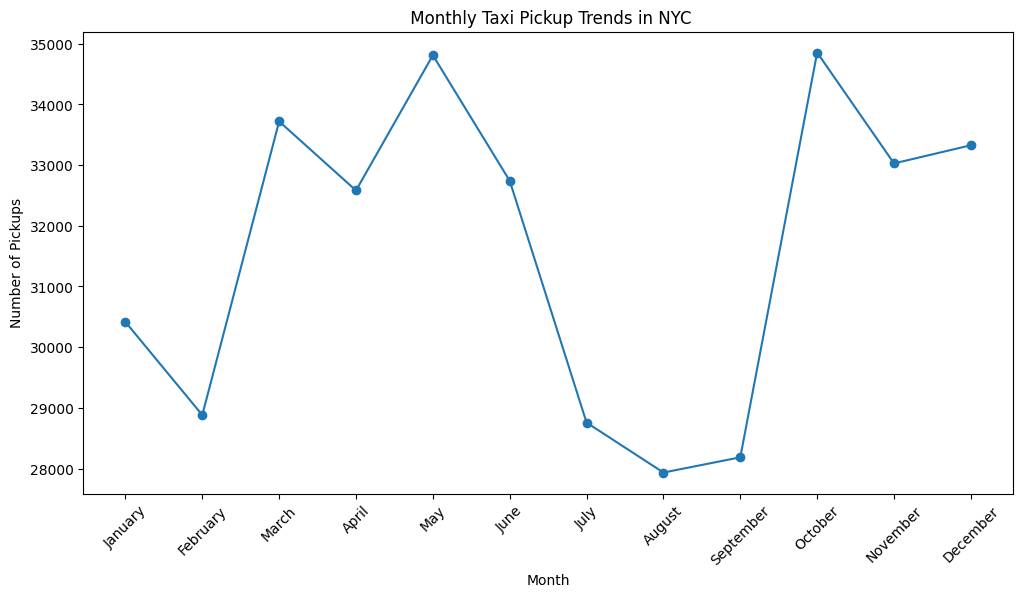

In [277]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_count = df['pickup_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_count.index, monthly_count.values, marker='o', linestyle='-')
plt.title(" Monthly Taxi Pickup Trends in NYC")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

# Conclusions:

# January & February: Lower activity - likely due to cold weather
# March - June: Gradual rise with a peak in June (maybe tourism or better weather)
# July & August: Notable dip - possibly vacation months
# October: Sharp rise - potentially due to fall travel, or tourism
# Nov-Dec: Slightly lower but stable - holiday season stabilizes demand

	# •	May, June & October could be top candidates for peak driver deployment
	# •	July & August may need incentives to boost supply/demand
	# •	Monitor events & tourist inflows — they clearly influence monthly demand

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

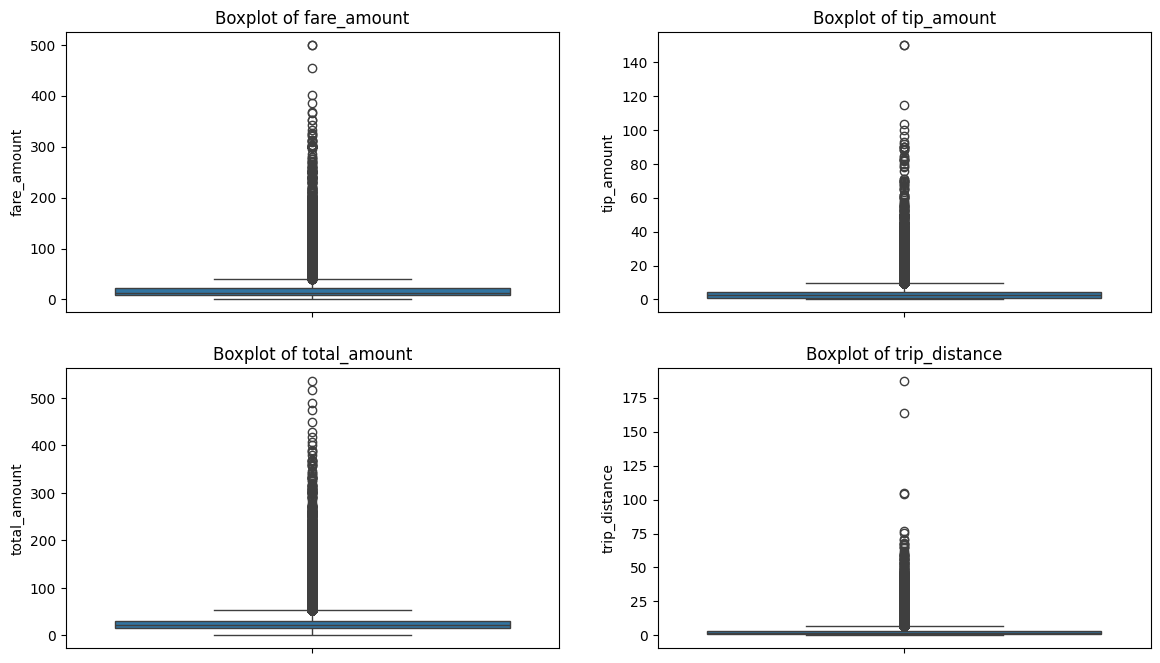

In [57]:
# Analyse the above parameters

# sns.boxplot(df['fare_amount'])
# plt.show()
# df = df[df['fare_amount'] <= 500]

plt.figure(figsize=(14, 8))
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for i, col in enumerate(financial_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')

plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [58]:
# Create a df with non zero entries for the selected parameters.
filtered_df = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (
        (df['trip_distance'] > 0) |
        (df['PULocationID'] == df['DOLocationID'])  # allow zero distance only for same-zone trips
    )
].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
January      672048.79
February     638997.17
March        761853.93
April        739387.79
May          820299.98
June         759765.07
July         639189.42
August       621147.46
September    664913.09
October      826561.95
November     768030.81
December     744729.02
Name: total_amount, dtype: float64


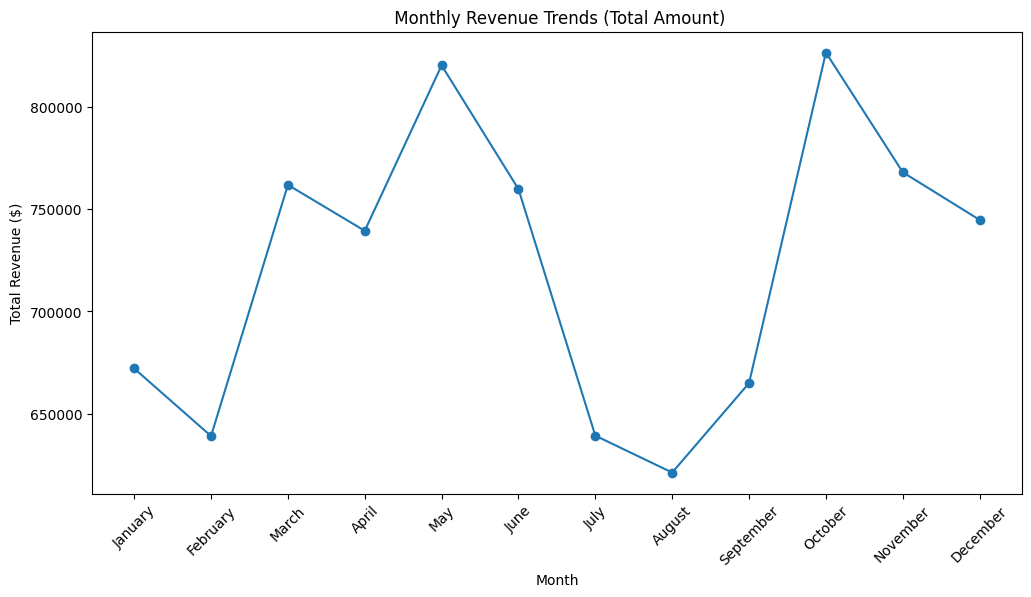

In [59]:
# Group data by month and analyse monthly revenue

monthly_revenue = filtered_df.groupby(filtered_df['pickup_month'])['total_amount'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
print(monthly_revenue)

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title(" Monthly Revenue Trends (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

# Conclusions:
# This graph is almost similar and accurate to Month vs Pickups Graph above.
# Therefore the conclusions drawn above is verified here
# January & February: Lower activity - likely due to cold weather
# March - June: Gradual rise with a peak in June (maybe tourism or better weather)
# July & August: Notable dip - possibly vacation months
# October: Sharp rise - potentially due to fall travel, or tourism
# Nov-Dec: Slightly lower but stable - holiday season stabilizes demand

	# •	May, June & October could be top candidates for peak driver deployment
	# •	July & August may need incentives to boost supply/demand
	# •	Monitor events & tourist inflows — they clearly influence monthly demand

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

tpep_pickup_datetime
1    2072899.89
2    2319452.84
3    1925249.97
4    2339321.78
Name: total_amount, dtype: float64


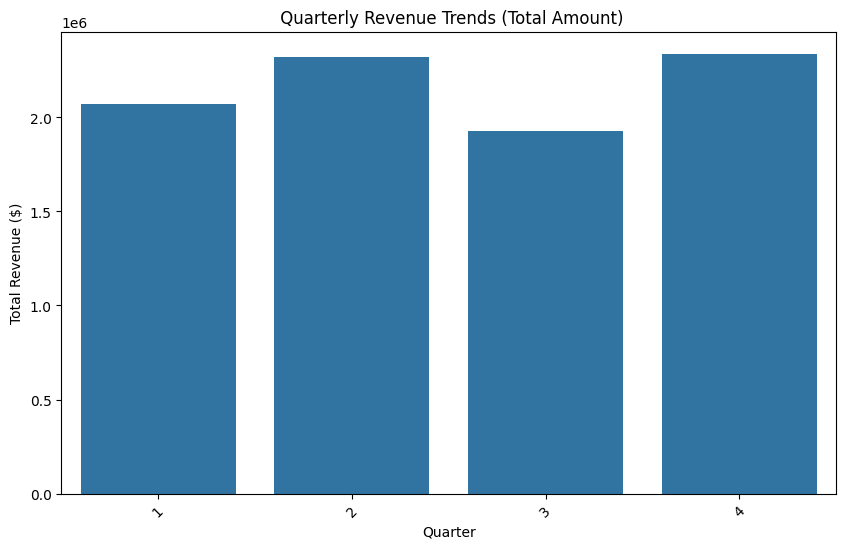

In [60]:
# Calculate proportion of each quarter

quarter_revenue = filtered_df.groupby(filtered_df['tpep_pickup_datetime'].dt.quarter)['total_amount'].sum()
print(quarter_revenue)
plt.figure(figsize=(10, 6))
sns.barplot(x=quarter_revenue.index, y=quarter_revenue.values)
plt.title(" Quarterly Revenue Trends (Total Amount)")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

0.9482050127012066


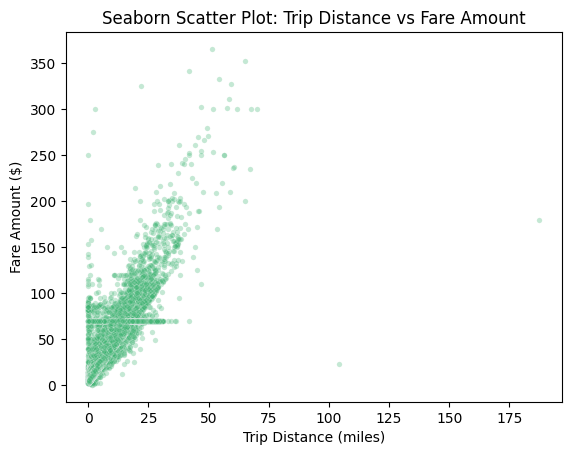

In [61]:
# Show how trip fare is affected by distance
nonzero_distance_df = filtered_df[filtered_df['trip_distance'] > 0]
correlation = nonzero_distance_df[['trip_distance', 'fare_amount']].corr()
print(correlation.iloc[0,1])
sns.scatterplot(data=nonzero_distance_df, x = 'trip_distance', y='fare_amount', alpha=0.3, s=15, color='mediumseagreen')
plt.title('Seaborn Scatter Plot: Trip Distance vs Fare Amount')
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

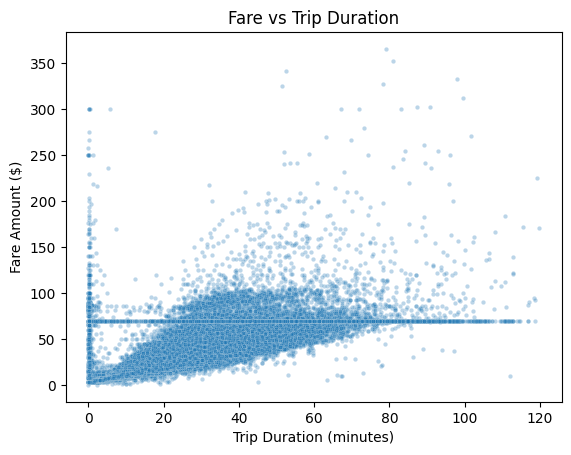

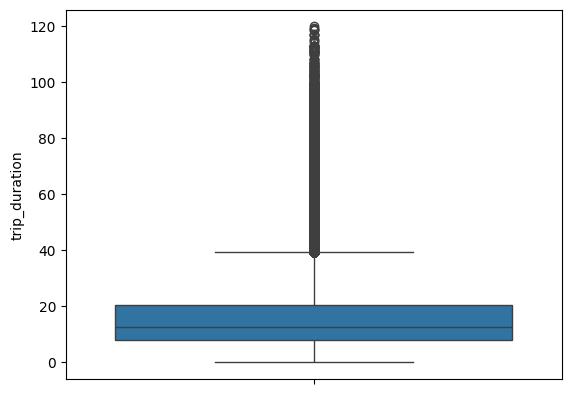

np.float64(0.8371826994382278)

In [63]:
# filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')
# filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'], errors='coerce')

# filtered_df['trip_duration'] = filtered_df.apply(lambda x: (x['tpep_dropoff_datetime']-x['tpep_pickup_datetime']).total_seconds()/60, axis=1)
# filtered_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head()


filtered_df = filtered_df[filtered_df['trip_duration']<=120]
filtered_df = filtered_df[filtered_df['trip_duration']>=0]
sns.scatterplot(data=filtered_df, x='trip_duration', y='fare_amount', alpha=0.3, s=10)
plt.title('Fare vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

sns.boxplot(y=filtered_df['trip_duration'])
plt.show()
corr1 = filtered_df[['fare_amount', 'trip_duration']].corr().iloc[0,1]
corr1
# Conclusions:
# A strong correlation and the scatter plot shows that as trip duration increases fare amount also increases

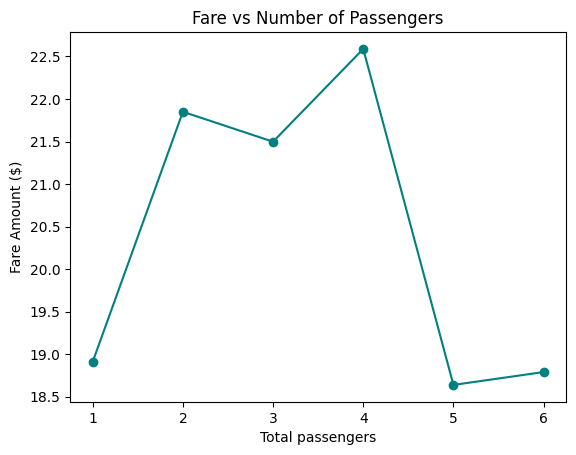

np.float64(0.038527047485148784)

In [64]:
# Show relationship between fare and number of passengers
avg_fare_per_passenger = filtered_df.groupby('passenger_count')['fare_amount'].mean()

plt.plot(avg_fare_per_passenger.index, avg_fare_per_passenger.values, marker='o', linestyle='-', color='teal')
plt.title('Fare vs Number of Passengers')
plt.xlabel('Total passengers')
plt.ylabel('Fare Amount ($)')
plt.show()

corr2 = filtered_df[['fare_amount', 'passenger_count']].corr().iloc[0,1]
corr2
# Conclusions:
# The correlation between passenger_count and fare_amount is just 0.03, indicating no significant linear relationship. This is expected, as NYC taxi fares are based on trip distance and time, not number of passengers.
# While average fares for 2–4 passengers are slightly higher, fares for 5 and 6 drop, likely due to limited data points or short group rides.


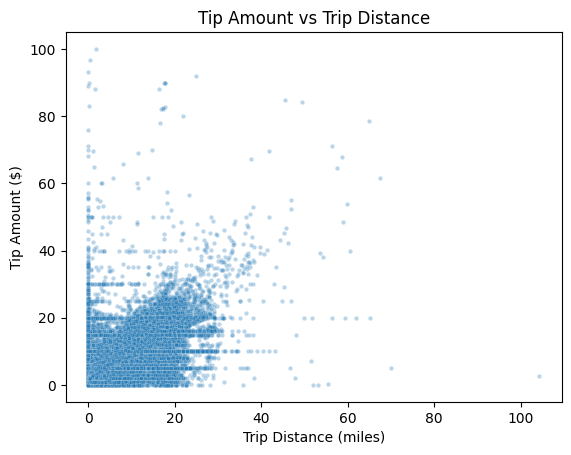

np.float64(0.7849876012254721)

In [65]:
# Show relationship between tip and trip distance
filtered_df = filtered_df[filtered_df['tip_amount'] <= 100]
sns.scatterplot(data=filtered_df, x='trip_distance', y='tip_amount', alpha=0.3, s=10)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()

corr3 = filtered_df[['tip_amount', 'trip_distance']].corr().iloc[0,1]
corr3
# Conclusions:
# Suggests that longer trips often result in higher tips
# A dense base of low-distance, low-tip trips (as expected)
# A clear upward spread in tip values with increasing trip distance
# A nice spread up to 80+ miles, with tip amounts maxing around $80–100 (after filtering)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

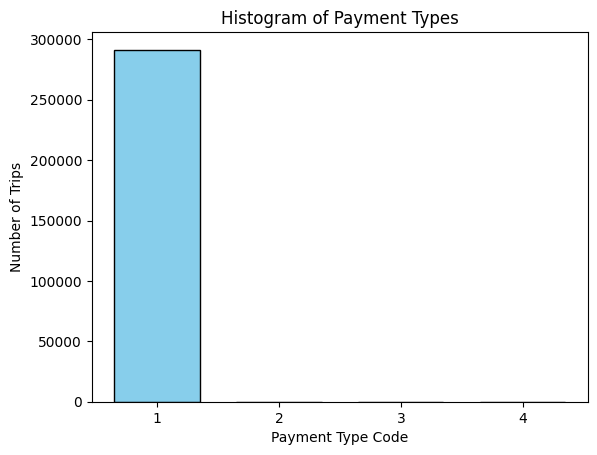

In [68]:
# Analyse the distribution of different payment types (payment_type).


# plt.figure(figsize=(8, 5))
# sns.countplot(data=filtered_df, x='payment_type')
# plt.title("Distribution of Payment Types")
# plt.xlabel("Payment Type Code")
# plt.ylabel("Number of Trips")
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.tight_layout()
# plt.show()

plt.hist(filtered_df['payment_type'], bins=range(1, 6), align='left', rwidth=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram of Payment Types")
plt.xlabel("Payment Type Code")
plt.ylabel("Number of Trips")
plt.xticks(ticks=range(1, 5))
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [69]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

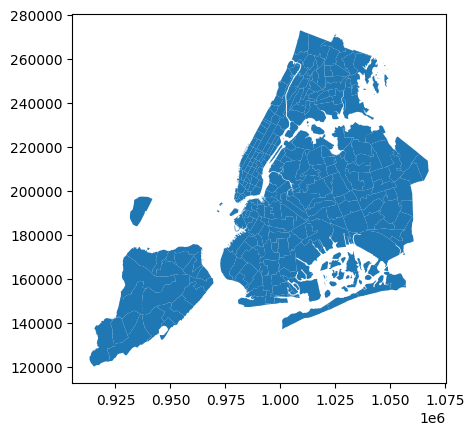

In [70]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [278]:
# Merge zones and trip records using locationID and PULocationID
zone_info = zones[['LocationID', 'zone', 'borough']]
zone_info
merged_df = filtered_df.merge(zone_info, how='left', left_on='PULocationID', right_on='LocationID')
merged_df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)
merged_df.drop(columns=['LocationID'], inplace=True)
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,Airport_fee,date,pickup_hour,pickup_day,pickup_month,trip_duration,pickup_zone,pickup_borough
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,...,33.96,2.5,0.0,2023-12-01,0,Friday,December,22.350000,Lower East Side,Manhattan
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,1.0,4.79,1.0,231,61,1,22.43,...,29.43,0.0,0.0,2023-12-01,0,Friday,December,23.116667,TriBeCa/Civic Center,Manhattan
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,...,18.84,2.5,0.0,2023-12-01,0,Friday,December,10.633333,Midtown Center,Manhattan
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,1.66,1.0,114,186,1,10.70,...,18.84,2.5,0.0,2023-12-01,0,Friday,December,8.683333,Greenwich Village South,Manhattan
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,2.45,1.0,164,232,1,14.90,...,20.90,2.5,0.0,2023-12-01,0,Friday,December,13.016667,Midtown South,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [72]:
# Group data by location and calculate the number of trips
pickup_counts = merged_df.groupby(by='PULocationID').size().reset_index(name='trip_count')
pickup_counts


,PULocationID,trip_count
0,1,25
1,4,323
2,6,1
3,7,71
4,9,1
...,...,...
187,261,1411
188,262,4079
189,263,5744
190,264,2634


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [73]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(pickup_counts, how='left', left_on='LocationID', right_on='PULocationID')
zones['trip_count'] = zones['trip_count'].fillna(0).astype(int)
zones.drop(columns=['PULocationID'], inplace=True)
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",25
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",323
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

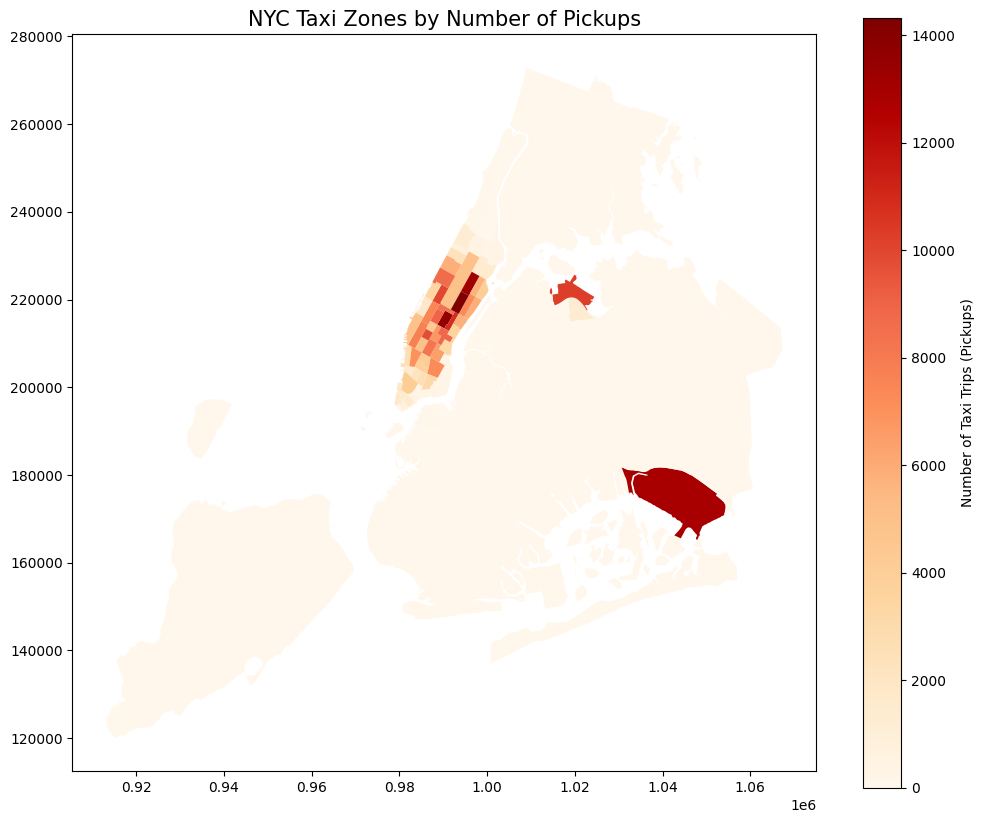

In [74]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='trip_count', cmap='OrRd', ax = ax, legend = True, legend_kwds = {'label': "Number of Taxi Trips (Pickups)", 'orientation': "vertical"})
ax.set_title("NYC Taxi Zones by Number of Pickups", fontsize=15) 
plt.show()

In [75]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('trip_count', ascending=False)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",14326
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",13634
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",13123
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",12873
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",10806
...,...,...,...,...,...,...,...,...
206,207,0.028376,0.000045,Saint Michaels Cemetery/Woodside,207,Queens,"POLYGON ((1011571.962 216050.175, 1011545.889 ...",0
205,206,0.212757,0.000944,Saint George/New Brighton,206,Staten Island,"POLYGON ((961436.305 175473.03, 961460.942 175...",0
22,23,0.290556,0.002196,Bloomfield/Emerson Hill,23,Staten Island,"POLYGON ((929937.155 170690.809, 929967.456 17...",0
203,204,0.101912,0.000641,Rossville/Woodrow,204,Staten Island,"POLYGON ((927766.539 141772.465, 927864.475 14...",0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [85]:

# dropoff_zone_info = zones[['LocationID', 'zone', 'borough']].copy()

# dropoff_zone_info.rename(columns={
#     'zone': 'dropoff_zone',
#     'borough': 'dropoff_borough'
# }, inplace=True)

# merged_df = merged_df.merge(
#     dropoff_zone_info,
#     how='left',
#     left_on='DOLocationID',
#     right_on='LocationID'
# )
# merged_df.drop(columns=['LocationID'], inplace=True)

# merged_df['pickup_zone'].fillna("Unknown Pickup")
# merged_df['dropoff_zone'].fillna("Unknown Dropoff")
# merged_df['route'] = merged_df['pickup_zone'] + " - " + merged_df['dropoff_zone']
merged_df['trip_duration_hr'] = merged_df['trip_duration'] / 60 
valid_trips = merged_df[
    (merged_df['trip_distance'] > 0) &
    (merged_df['trip_duration_hr'] > 0)
].copy()

route_speed = (
    valid_trips.groupby(['route', 'pickup_hour'])
    .agg({
        'trip_distance': 'mean',
        'trip_duration_hr': 'mean'
    })
    .reset_index()
)

route_speed['speed_mph'] = route_speed['trip_distance'] / route_speed['trip_duration_hr']

route_speed = route_speed.replace([float('inf'), -float('inf')], None)
route_speed = route_speed.dropna(subset=['speed_mph'])

slowest_routes = route_speed.sort_values(by='speed_mph').head(10)
slowest_routes

,route,pickup_hour,trip_distance,trip_duration_hr,speed_mph
35878,Midtown North - Financial District North,15,0.09,0.642500,0.140078
56948,Williamsburg (North Side) - Williamsburg (Sout...,2,0.01,0.070833,0.141176
41679,Queensbridge/Ravenswood - Queensbridge/Ravenswood,11,0.01,0.066667,0.150000
16201,Greenwich Village North - Park Slope,19,0.09,0.587500,0.153191
13002,Fort Greene - Fort Greene,16,0.01,0.033333,0.300000
39997,Newark Airport - Newark Airport,11,0.01,0.032500,0.307692
45737,Times Sq/Theatre District - Times Sq/Theatre D...,5,0.18,0.493056,0.365070
32554,Meatpacking/West Village West - Sutton Place/T...,19,0.24,0.537778,0.446281
38435,Morningside Heights - Morningside Heights,0,0.01,0.018333,0.545455
10642,Financial District North - Financial District ...,4,0.01,0.013056,0.765957


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18 | Number of trips: 21192


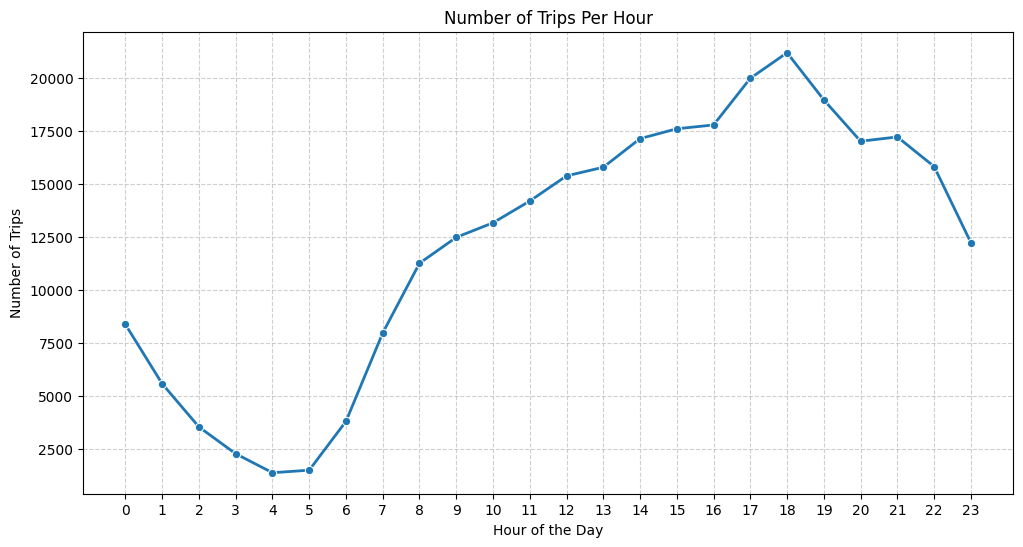

In [140]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = merged_df['pickup_hour'].value_counts()
busiest_hour = hourly_trips.index[0]
busiest_count = hourly_trips.values[0]
print('Busiest hour: ' + str(busiest_hour) + ' | Number of trips: '+ str(busiest_count))

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_trips.index, y=hourly_trips.values, marker='o', linewidth=2)
plt.title("Number of Trips Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [119]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01
busiest_hours = merged_df['pickup_hour'].value_counts().head(5)

estimated_trips = (busiest_hours / sample_fraction).astype(int)

print("Estimated actual number of trips in the five busiest hours:")
print(estimated_trips)



Estimated actual number of trips in the five busiest hours:
pickup_hour
18    2119200
17    1998600
19    1896400
16    1778200
15    1760100
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

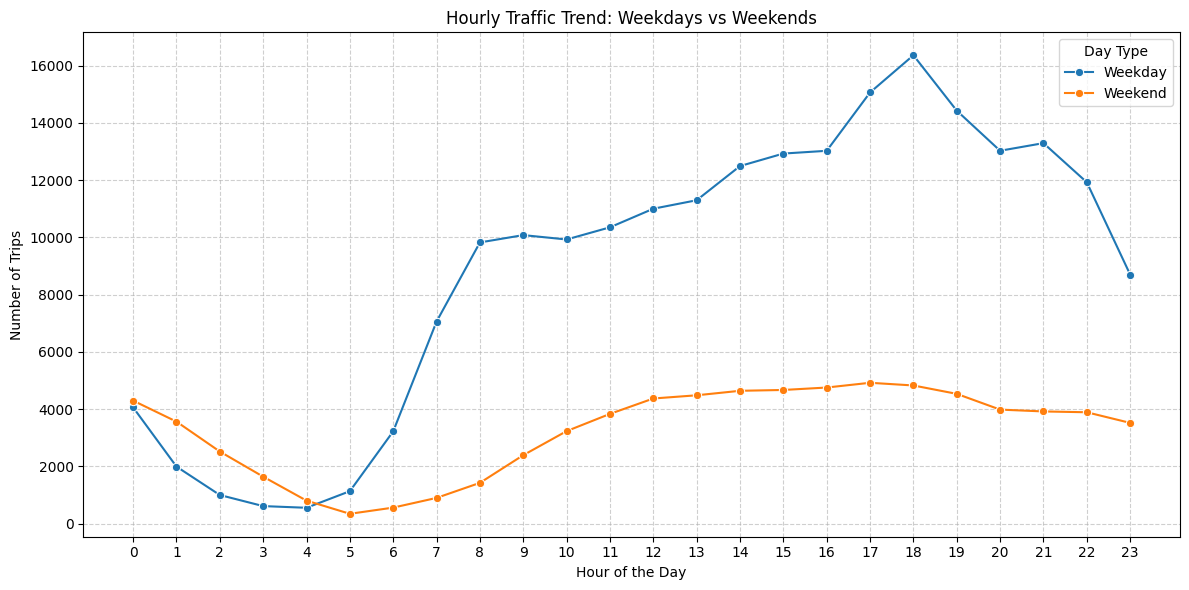

In [143]:
# Compare traffic trends for the week days and weekends

merged_df['day_type'] = merged_df['pickup_day'].apply(lambda x: 'Weekend' if (x in ['Saturday', 'Sunday']) else 'Weekday')
hourly_trend = merged_df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')
hourly_trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title("Hourly Traffic Trend: Weekdays vs Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

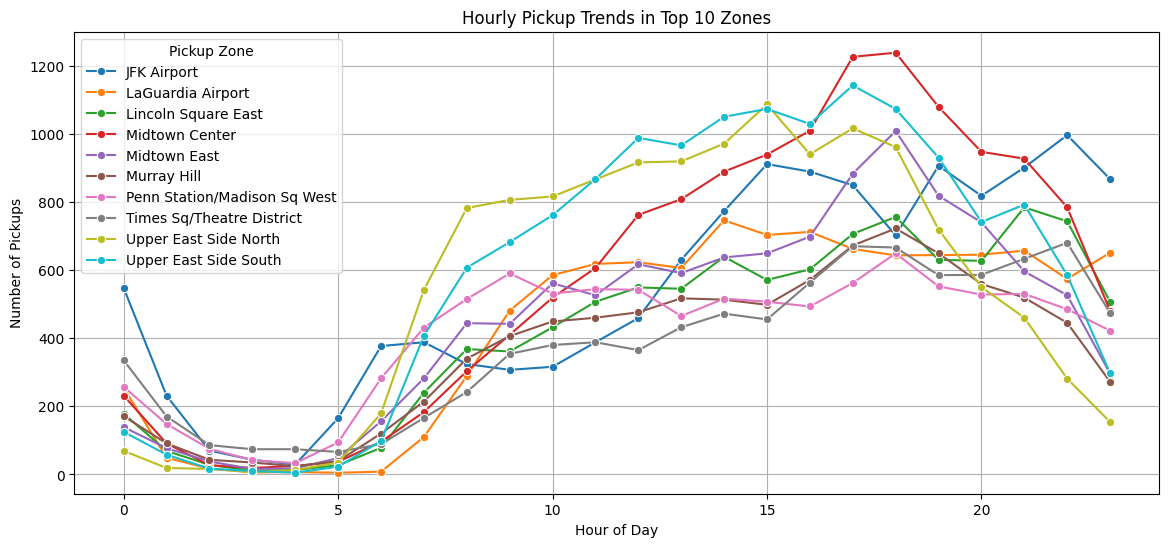

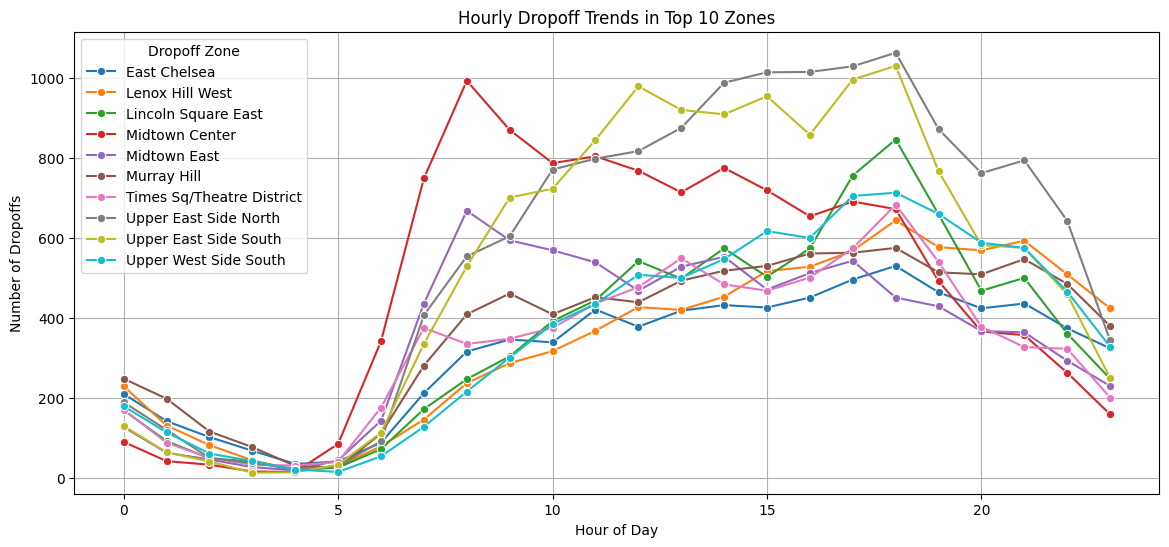

In [160]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = merged_df['pickup_zone'].value_counts().head(10)
# print(top_pickup_zones)
top_dropoff_zones = merged_df['dropoff_zone'].value_counts().head(10)
# print(top_dropoff_zones)

top_pickup_zones_list = top_pickup_zones.index.tolist()
top_dropoff_zones_list = top_dropoff_zones.index.tolist()

filtered_pickup = merged_df[merged_df['pickup_zone'].isin(top_pickup_zones_list)]
filtered_dropoff = merged_df[merged_df['dropoff_zone'].isin(top_dropoff_zones_list)]

pickup_grouped = filtered_pickup.groupby(['pickup_hour', 'pickup_zone']).size().reset_index(name='trip_count')
dropoff_grouped = filtered_dropoff.groupby(['pickup_hour', 'dropoff_zone']).size().reset_index(name='trip_count')


plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_grouped, x='pickup_hour', y='trip_count', hue='pickup_zone', marker='o')
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone', loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_grouped, x='pickup_hour', y='trip_count', hue='dropoff_zone', marker='o')
plt.title('Hourly Dropoff Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zone', loc='upper left')
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [169]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = merged_df['pickup_zone'].value_counts()

dropoff_counts = merged_df['dropoff_zone'].value_counts()

zone_ratio_df = pd.DataFrame({'pickups': pickup_counts, 'dropoffs': dropoff_counts})

zone_ratio_df['ratio'] = zone_ratio_df['pickups'] / zone_ratio_df['dropoffs']

print(zone_ratio_df.sort_values(by='ratio', ascending=False).head(10))
print(zone_ratio_df.sort_values(by='ratio', ascending=True).head(10))

                              pickups  dropoffs      ratio
East Elmhurst                  1290.0        97  13.298969
JFK Airport                   12886.0      3061   4.209735
LaGuardia Airport             10295.0      3971   2.592546
South Jamaica                    27.0        15   1.800000
Penn Station/Madison Sq West   9793.0      6139   1.595211
Central Park                   4966.0      3525   1.408794
West Village                   7038.0      5167   1.362106
Greenwich Village South        3968.0      2954   1.343263
Midtown East                  10806.0      8460   1.277305
Garment District               4351.0      3576   1.216723
                        pickups  dropoffs     ratio
Bay Ridge                   3.0       161  0.018634
Rego Park                   1.0        52  0.019231
Kew Gardens Hills           1.0        50  0.020000
Marine Park/Mill Basin      1.0        45  0.022222
Midwood                     1.0        43  0.023256
Windsor Terrace             3.0       1

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [174]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = merged_df[(merged_df['pickup_hour']>=23) | (merged_df['pickup_hour']<=5)]
top_pickups = night_df['pickup_zone'].value_counts().head(10)
print("Top 10 Pickup Zones During Night Hours (11 PM to 5 AM):")
print(top_pickups)

top_dropoffs = night_df['dropoff_zone'].value_counts().head(10)
print("\n Top 10 Dropoff Zones During Night Hours (11 PM to 5 AM):")
print(top_dropoffs)


Top 10 Pickup Zones During Night Hours (11 PM to 5 AM):
pickup_zone
East Village                    2644
West Village                    2201
JFK Airport                     1952
Lower East Side                 1665
Clinton East                    1602
Greenwich Village South         1437
Times Sq/Theatre District       1279
Penn Station/Madison Sq West    1071
LaGuardia Airport                989
East Chelsea                     970
Name: count, dtype: int64

 Top 10 Dropoff Zones During Night Hours (11 PM to 5 AM):
dropoff_zone
East Village                     1422
Clinton East                     1099
Murray Hill                      1068
Gramercy                          986
Lenox Hill West                   952
East Chelsea                      915
Yorkville West                    904
West Village                      817
Upper East Side North             785
Sutton Place/Turtle Bay North     756
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [178]:
# Filter for night hours (11 PM to 5 AM)
night_df = merged_df[(merged_df['pickup_hour'] >= 23) | (merged_df['pickup_hour'] <= 5)]
day_df = merged_df[(merged_df['pickup_hour'] >= 6) & (merged_df['pickup_hour'] <= 22)]
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

night_revenue_share = (night_revenue/total_revenue)*100
day_revenue_share = (day_revenue/total_revenue)*100
print(f" Night Revenue Share (11 PM - 5 AM): {night_revenue_share:.2f}%")
print(f" Day Revenue Share (6 AM - 10 PM): {day_revenue_share: .2f}%")

 Night Revenue Share (11 PM - 5 AM): 12.21%
 Day Revenue Share (6 AM - 10 PM):  87.79%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [191]:
# Analyse the fare per mile per passenger for different passenger counts

valid_fares = merged_df[(merged_df['trip_distance']>0) & (merged_df['passenger_count']>0)].copy()
valid_fares['fare_per_mile'] = valid_fares['fare_amount']/valid_fares['trip_distance']
valid_fares['fare_per_mile_per_passenger'] = valid_fares['fare_per_mile']/valid_fares['passenger_count']
average_fares = valid_fares.groupby(['passenger_count'])['fare_per_mile_per_passenger'].mean().round(2)
average_fares

passenger_count
1.0    9.13
2.0    5.31
3.0    3.91
4.0    3.14
5.0    1.51
6.0    1.27
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [208]:
# Compare the average fare per mile for different days and for different times of the day

average_fare_by_day = valid_fares.groupby('pickup_day')['fare_per_mile'].mean().round(2)
print(f" Average fare per mile for different days: {average_fare_by_day.sort_values(ascending=False)}")
average_fare_by_hour = valid_fares.groupby('pickup_hour')['fare_per_mile'].mean().round(2)
print(f" \n Average fare per mile for different times of the day: {average_fare_by_hour.sort_values(ascending=False)}")



 Average fare per mile for different days: pickup_day
Thursday     10.53
Sunday       10.48
Tuesday       9.25
Saturday      9.18
Friday        9.16
Monday        9.02
Wednesday     8.65
Name: fare_per_mile, dtype: float64
 
 Average fare per mile for different times of the day: pickup_hour
4     17.74
6     12.32
16    12.25
14    10.68
13    10.36
11    10.35
5     10.31
17    10.26
12    10.11
18     9.81
19     9.78
15     9.52
9      9.38
1      9.14
10     8.86
8      8.38
21     8.19
7      8.12
3      8.12
22     8.00
0      7.92
2      7.71
23     7.54
20     7.31
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [213]:
# Compare fare per mile for different vendors

average_fare_by_vendor = valid_fares.groupby(['VendorID', 'pickup_hour'] )['fare_per_mile'].mean().round(2).reset_index()
average_fare_by_vendor

,VendorID,pickup_hour,fare_per_mile
0,1,0,6.43
1,1,1,6.54
2,1,2,6.48
3,1,3,6.29
4,1,4,7.23
5,1,5,7.82
6,1,6,6.31
7,1,7,6.99
8,1,8,7.98
9,1,9,8.06


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [215]:
# Defining distance tiers
def distance_tier(d):
    if d<=2:
        return 'Short (<=2 miles)'
    elif d<=5:
        return 'Medium (2-5 miles)'
    else:
        return 'High (>5 miles)'
valid_fares['distance_tier'] = valid_fares['trip_distance'].apply(distance_tier)

tiered_avg_fare = valid_fares.groupby(['VendorID', 'distance_tier'] )['fare_per_mile'].mean().round(2).reset_index()
tiered_avg_fare

,VendorID,distance_tier,fare_per_mile
0,1,High (>5 miles),4.46
1,1,Medium (2-5 miles),6.36
2,1,Short (<=2 miles),9.42
3,2,High (>5 miles),4.48
4,2,Medium (2-5 miles),6.53
5,2,Short (<=2 miles),13.68


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [264]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_tips = merged_df[(merged_df['fare_amount']>0) & (merged_df['tip_amount']>=0)].copy()
valid_tips['tip_percent'] = (valid_tips['tip_amount']/valid_tips['fare_amount'])*100

avg_tip_by_distance = valid_tips.groupby(['trip_distance'])['tip_percent'].mean().round(2)
print(f" Average tip based on distance: \n{avg_tip_by_distance}")
avg_tip_by_passenger_count = valid_tips.groupby(['passenger_count'])['tip_percent'].mean().round(2)
print(f" \n Average tip based on passenger count:\n {avg_tip_by_passenger_count}")

avg_tip_by_pickup_time = valid_tips.groupby(['pickup_hour'])['tip_percent'].mean().round(2)
print(f" \n Average tip based on pickup time: \n{avg_tip_by_pickup_time}")


 Average tip based on distance: 
trip_distance
0.00      687.91
0.01       55.80
0.02       26.37
0.03       35.61
0.04       25.10
           ...  
65.05      22.28
65.15      10.00
67.51      20.50
70.10       1.67
104.30     11.72
Name: tip_percent, Length: 2868, dtype: float64
 
 Average tip based on passenger count:
 passenger_count
1.0    29.34
2.0    25.83
3.0    25.71
4.0    25.73
5.0    26.21
6.0    25.94
Name: tip_percent, dtype: float64
 
 Average tip based on pickup time: 
pickup_hour
0     25.70
1     26.82
2     26.46
3     26.98
4     26.70
5     24.74
6     25.59
7     24.94
8     25.06
9     25.12
10    25.66
11    25.48
12    25.69
13    25.63
14    25.80
15    64.79
16    27.48
17    27.31
18    27.50
19    27.43
20    26.35
21    26.17
22    26.10
23    25.94
Name: tip_percent, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [269]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tips = valid_tips[valid_tips['tip_percent']<10]
high_tips = valid_tips[valid_tips['tip_percent']>25]
print('Low tip (<10%): ')
print(low_tips[['fare_amount', 'trip_distance', 'total_amount', 'passenger_count', 'tip_amount']].mean().round(2))
print('\n High tip (>25%): ')
print(high_tips[['fare_amount', 'trip_distance', 'total_amount', 'passenger_count', 'tip_amount']].mean().round(2))

Low tip (<10%): 
fare_amount        26.51
trip_distance       4.83
total_amount       33.81
passenger_count     1.36
tip_amount          1.68
dtype: float64

 High tip (>25%): 
fare_amount        14.38
trip_distance       2.29
total_amount       24.41
passenger_count     1.36
tip_amount          4.42
dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [233]:
# See how passenger count varies across hours and days
avg_passengers_by_hours = merged_df.groupby('pickup_hour')['passenger_count'].mean().round(2)
print(avg_passengers_by_hours)
avg_passengers_by_days = merged_df.groupby('pickup_day')['passenger_count'].mean().round(2)
print(avg_passengers_by_days)


pickup_hour
0     1.40
1     1.44
2     1.42
3     1.42
4     1.33
5     1.27
6     1.22
7     1.26
8     1.27
9     1.29
10    1.34
11    1.34
12    1.35
13    1.35
14    1.37
15    1.40
16    1.38
17    1.35
18    1.34
19    1.36
20    1.36
21    1.40
22    1.41
23    1.43
Name: passenger_count, dtype: float64
pickup_day
Friday       1.38
Monday       1.33
Saturday     1.45
Sunday       1.44
Thursday     1.32
Tuesday      1.31
Wednesday    1.31
Name: passenger_count, dtype: float64


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [234]:
# How does passenger count vary across zones

avg_passengers_by_zones = merged_df.groupby('pickup_zone')['passenger_count'].mean().round(2)
avg_passengers_by_zones

pickup_zone
Alphabet City              1.34
Arrochar/Fort Wadsworth    3.00
Astoria                    1.18
Auburndale                 1.00
Baisley Park               1.49
                           ... 
Woodhaven                  1.00
Woodside                   1.48
World Trade Center         1.42
Yorkville East             1.29
Yorkville West             1.34
Name: passenger_count, Length: 190, dtype: float64

In [239]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
merged_df['avg_passenger_count'] = merged_df['pickup_zone'].map(avg_passengers_by_zones)
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_month,trip_duration,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough,route,trip_duration_hr,day_type,avg_passenger_count
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,...,December,22.350000,Lower East Side,Manhattan,Clinton West,Manhattan,Lower East Side - Clinton West,0.372500,Weekday,1.44
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,1.0,4.79,1.0,231,61,1,22.43,...,December,23.116667,TriBeCa/Civic Center,Manhattan,Crown Heights North,Brooklyn,TriBeCa/Civic Center - Crown Heights North,0.385278,Weekday,1.32
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,...,December,10.633333,Midtown Center,Manhattan,Midtown Center,Manhattan,Midtown Center - Midtown Center,0.177222,Weekday,1.36
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,1.66,1.0,114,186,1,10.70,...,December,8.683333,Greenwich Village South,Manhattan,Penn Station/Madison Sq West,Manhattan,Greenwich Village South - Penn Station/Madison...,0.144722,Weekday,1.42
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,2.45,1.0,164,232,1,14.90,...,December,13.016667,Midtown South,Manhattan,Two Bridges/Seward Park,Manhattan,Midtown South - Two Bridges/Seward Park,0.216944,Weekday,1.39


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [250]:
# How often is each surcharge applied?
total_trips = len(merged_df)
for col in ['extra', 'mta_tax', 'congestion_surcharge', 'Airport_fee', 'improvement_surcharge', 'tolls_amount']:
    percent = round(((merged_df[col]>0).sum()/total_trips)*100,2)
    print(f"{col}: {percent}%")

extra_by_pickup_zone = merged_df.groupby('pickup_zone')['extra'].mean().round(2).sort_values(ascending=False).head(10)
print(f"\nTop Pickup Zones where extra charges are applied frequently: \n{extra_by_pickup_zone}")

extra_by_dropoff_zone = merged_df.groupby('dropoff_zone')['extra'].mean().round(2).sort_values(ascending=False).head(10)

print(f"\nTop Dropoff Zones where extra charges are applied frequently: \n{extra_by_dropoff_zone}")


extra: 61.96%
mta_tax: 99.25%
congestion_surcharge: 92.31%
Airport_fee: 7.99%
improvement_surcharge: 100.0%
tolls_amount: 8.1%

Top Pickup Zones where extra charges are applied frequently: 
pickup_zone
LaGuardia Airport            6.28
East Elmhurst                4.77
Auburndale                   2.50
City Island                  2.50
South Jamaica                1.83
Jackson Heights              1.72
Midtown Center               1.69
Times Sq/Theatre District    1.68
Midtown East                 1.61
Battery Park City            1.59
Name: extra, dtype: float64

Top Dropoff Zones where extra charges are applied frequently: 
dropoff_zone
LaGuardia Airport               5.24
Astoria Park                    4.17
Bedford Park                    3.69
Heartland Village/Todt Hill     3.67
Queens Village                  3.46
East Tremont                    3.46
Whitestone                      3.36
Pelham Parkway                  3.26
East Flushing                   3.23
Schuylerville/Edgewa

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies


Based on our **temporal and geographical analysis**, we identified key patterns and trends in taxi demand and operational inefficiencies:

---

### 🔁 **Routing & Dispatch**

- **Peak Pickup Hours**: The highest number of pickups occurs between **5 PM and 7 PM**, particularly on weekdays, highlighting the evening rush.  
  → Suggest increasing driver availability in business areas during these times.

- **Night Hour Trends**: High activity in areas such as **East Village, West Village, JFK**, and **Times Square** from **11 PM to 2 AM**.  
  → Focus night dispatch efforts in nightlife areas and transportation hubs.

- **High Drop-off Only Zones**: Certain areas experience **high drop-offs but few pickups**, likely residential neighborhoods.  
  → Recommend sending more taxis to these areas for pickups after drop-offs.

- **Slowest Routes**: We identified routes with **low average speeds and high trip durations**, especially in **Midtown** zones during peak hours.  
  → Consider implementing dynamic re-routing or offering price incentives to reduce congestion and promote travel along faster routes.

---

### ⏰ **Patterns by Time of Day & Day of the Week**

- **Sunday and Thursday** recorded the **highest average fare per mile**, suggesting potential for **premium pricing**.
- The number of passengers remains relatively stable throughout the day; however, during late-night hours **(12 AM to 4 AM)**, shared or group rides are frequently observed.
➡️ **Strategy**: Adjust pricing and availability based on these trends, such as providing discounts during off-peak hours or for individual passengers.

---

### 🌍 **Geographically-Focused Insights**


- **East Village, JFK, and Times Square** regularly appear among the **leading pickup and drop-off areas**.  
- **Airport Zones** like **JFK and LaGuardia** experience **elevated fare rates and surcharges** — concentrate on **dispatch and queue** in these locations.  
- The **average number of passengers per trip** increases in **residential pickup areas during early morning hours**.

➡️ **Strategy**:  
- Ensure availability close to **train stations** and **nightlife areas** post **9 PM**.  
- Utilize **average passenger counts** at the zone level to promote **bigger ride shares** when applicable.
---

### 💸 **Financial Efficiency & Pricing Approach**
- The **cost per mile decreases** as distances grow.  
- **Surcharges** such as **congestion surcharge** and **improvement_surcharge** are implemented in **95–100%** of journeys.  
- **Extra charges** (night/peak) are most common from **8 PM to 6 AM**, particularly in **entertainment areas**.

➡️ **Strategy**:  
- Implement **distance-related incentives** to ensure **profitability on short journeys**.  
- Create strategies to **promote tipping** during periods or areas with **low tips**.  
- Avoid **excessive pricing** in regions that already have **high surcharges** to maintain **customer satisfaction**.  
- The **slow routes** were identified during **peak hours** in **Midtown Manhattan**, by **high trip duration** and **low speed**.  
- These regions lead to **financial losses** due to **extended periods of inactivity**.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

| Time Window     | Zone Recommendations                                        | Strategy                                                           |
|-----------------|-------------------------------------------------------------|--------------------------------------------------------------------|
| 12 AM – 5 AM    | Times Square, East Village, JFK, Midtown Nightlife Hubs     | Overall low demand, but send specific cabs to nightlife and airport zones only. |
| 6 AM – 9 AM     | Residential zones (e.g. Astoria, East New York, Harlem)     | Focus on residential pickups as people head to work.           |
| 10 AM – 4 PM    | Midtown, Financial District, Museums/Attractions            | Place cabs near offices, hospitals, and tourist destinations.     |
| 5 PM – 7 PM     | Office exits: Wall Street, Penn Station, Midtown            | Peak demand — maximize availability here.                         |
| 8 PM – 11 PM    | East/West Village, SoHo (nightlife hubs)                    | Maintain moderate fleet near restaurants, bars, and clubs.        |

| Day             | Zone                                   | Strategy                                               |
|-----------------|------------------------------------------------|--------------------------------------------------------------------|
| Monday          | Lowest activity post-weekend                   | Reduce fleet; schedule for breaks or servicing.                     |
| Tuesday–Thursday| Steady rise due to regular workweek            | Keep cabs near workplaces and transportation centers.                           |
| Thursday        | Highest weekday demand (after-work outings)    | Enhance evening coverage in dining/event areas.                      |
| Friday–Saturday | Strong nighttime activity in entertainment areas| Concentrate on coverage of nightlife/tourist areas during late nights.           |
| Sunday          | Slight drop, but airport trips are higher      | Position more cabs near airports and train stations.               |

| Months     | Observations                                         | Strategy                                                     |
|-----------------|----------------------------------------------------------|--------------------------------------------------------------------|
| Jan–Feb         | Lower activity due to cold weather                       | Reduce fleet; offer incentives or breaks.                    |
| Mar–June        | Gradual rise with tourism boost                          | Increase availability in high-demand areas (parks, museums, etc.).        |
| Jul–Aug         | Dip due to vacations                                     | Focus on airports and vacation hotspots.                          |
| October         | Sharp rise due to tourism and fall activities            | Position cabs near major attractions and hotels.                   |
| Nov–Dec         | Steady demand due to holidays                            | Include shopping, airports, and transportation hubs.                 |

🧭 Zone-Specific Strategy:

• Airports (JFK, LaGuardia): Expensive fare rides; maintain a dedicated queue for cab rotation in this area. Evening and weekend highs.

• Midtown Manhattan: Most active area, particularly from 10 AM to 7 PM; essential for weekday operations.

• Times Square & Soho: Increased pickups during weekends and evenings. Ideal for drivers at night.

• Astoria, Harlem, Queens areas: Elevated morning pick-ups during weekdays — residential.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.


### 1. 📈 Tiered Fare Rates Based on Distance

| Distance Range     | Observation                                          | Pricing Strategy                            |
|--------------------|------------------------------------------------------|--------------------------------------------------------|
| 0 – 2 miles    | Highest volume of short trips, mostly solo riders   | Base fare + slightly higher per-mile rate             |
| 2 – 5 miles     | Moderate traffic, commuting areas                    | Standard per-mile rate                                |
| > 5 miles       | Extended journeys, reduced number of trips, but increased revenue          | Apply minor per-mile discount to encourage longer rides |

### 2. 🕑 Time-Based Dynamic Pricing

| Time of Day       | Demand Level                | Suggested Fare Adjustment             |
|-------------------|-----------------------------|----------------------------------------|
| 6 AM – 9 AM    | Commuter surge              | +10% variable pricing                   |
| 5 PM – 7 PM   | Peak demand                 | +15% variable pricing                   |
| 12 AM – 5 AM   | Low demand, high cost zones | Standard rates + night surcharge |


### 3. 📅 Day and Month-Based Pricing Variations

| Period             | Observations                       | Strategy                     |
|--------------------|------------------------------------|----------------------------------------|
| Thursdays       | Highest weekday demand             | Activate surge pricing 5 PM onward   |
| Weekends        | Increased leisure/nightlife trips       | Additional night extra (already implemented) |
| June & October  | Peak months                        | Consider slight price increase (5%)        |
| July & August   | Dip in trips                       | Offer promotions or discounts |

### 4. 💳 Encourage Cashless & Tipping with Fare Transparency

| Parameter              | Insight                                | Strategy                                 |
|------------------------|----------------------------------------|------------------------------------------|
| Tips increases with distance | Correlation ~0.78                    | Display estimated tip ranges post-trip      |
| Credit payments increase   | More tipping than cash users          | Promote in-app/online payments  |
